# **Analyse et modélisation de séries temporelles**

## **1. Notions de bases**

### **1.1. Définition**

Une série temporelle (ou chronologique), est une suite de valeurs numériques représentant l’évolution d’une quantité au cours du temps. On la note généralement $\{y_t\}_{t=1}^{T}$.  
NB: on parle parfois de processus ou processus stochastique qui fait référence au processus, **inconnu et non observable**, qui a entraîné ces observations.

### **1.2. Les composantes d'une série temporelle**

Une série temporelle peut se décomposer en 4 composantes :
- **Tendance** : orientation générale de la série (vers le haut ou vers le bas)
- **Saisonnalité** : tendances hebdomadaires, mensuelles, trismestrielles ou annuelles
- **Cycle** : cycles économiques à long terme, sur plusieurs années
- **Bruit** : ce qui reste après avoir extrait les composants précédents

On verra plus loin comment décomposer une série temporelle.

### **1.3. La stationnarité**

Un processus $\{y_t\}_{t=1}^{T}$ est dit stationnaire lorsque : 
- $E(y_t) = \mu$
- $V(y_t) = \sigma^2$
- $\gamma(t,s) = \gamma(t-s)$ où $\gamma$ est la fonction d'autocorrélation qu'on va découvrir de suite

Ok c'est joli les formules, mais concrètement ça veut dire quoi qu'une série est stationnaire ?

- Premièrement, la moyenne de la série est constante et ne dépend donc pas du temps. La courbe rouge ci-dessous n'est dès lors pas stationnaire puisque sa moyenne augmente en fonction du temps

<img src='img/station1.png' width=700>

- Deuxièmement, la variance de la série est constante et ne dépend donc pas du temps. On parle **d'homoscédasticité**. La courbe rouge ci-dessous n'est dès lors pas stationnaire puisque l'écart des points à leur moyenne (représentée par la droite bleue) varie au cours du temps.

<img src='img/station2.png' width=700>

- Troisièmement, la covariance entre 2 points ne dépend pas du temps mais uniquement de l'écart entre ces points. La courbe rouge ci-dessous n'est dès lors pas stationnaire puisque l'espacement entre les points varie au cours du temps (ceux du milieu sont beaucoup plus proches entre eux que ceux aux extremités).

<img src='img/station3.png' width=700>

### **1.4. L'autocorrélation et l'autocorrélation partielle**

L'autocorrélation est la covariance entre deux valeurs d'une même série :
$$\gamma(t,s) = Cov(y_t,y_s) = E[(y_t-\mu_t)(y_s-\mu_s)]$$
Cet indicateur montre comment les observations d'une série temporelle sont liées entre elles.

La **fonction d'autocorrélation (ACF)** et la **fonction d'autocorrélation partielle (PACF)** permettent de mesurer l'association entre des valeurs actuelles et passées. Elles indiquent les valeurs passées les plus corrélées aux valeurs suivantes et donc les plus utiles à la prévision de valeurs futures. Pour parler _"avec les mains"_, la fonction ACF mesure la similitude entre 2 observations en fonction du décalage temporel entre les 2.

Concrètement :
- ACF au décalage k = corrélation entre les valeurs séparées par k intervalles
- PACF au décalage k = corrélation entre les valeurs séparées par k intervalles, compte tenu des valeurs des intervalles intermédiaires

![acfpacf](img/acf_pacf.png)

Ces graphiques interviennent dans la détermination de l'ordre des processus d'un modèle ARIMA qu'on va voir bientôt car je suis sûr que vous avez hââââââte.

### **1.5. Bruit blanc**

Un **bruit blanc** est un processus $\{\epsilon_t\}_{t=1}^{T}$ qui vérifie :
>- $E[\epsilon_t] = 0$
>- $E[\epsilon_t^2] = \sigma^2$
>- $E[\epsilon_t\epsilon_s] = 0$ pour $s \neq t$

Un **bruit blanc indépendant** est un processus $\{\epsilon_t\}_{t=1}^{T}$ qui vérifie :
>- $E[\epsilon_t] = 0$
>- $E[\epsilon_t^2] = \sigma^2$
>- $\epsilon_t$ et $\epsilon_s$ indépendants pour $s \neq t$

Un **bruit blanc gaussien** $\{\epsilon_t\}_{t=1}^{T}$ est un bruit blanc indépendant qui suit une loi normale centrée : $\epsilon_t \hookrightarrow \mathcal{N}(0,\sigma^2)$

Intuitivement, un bruit blanc dans le cadre des séries temporelles, c'est la partie purement aléatoire du processus.

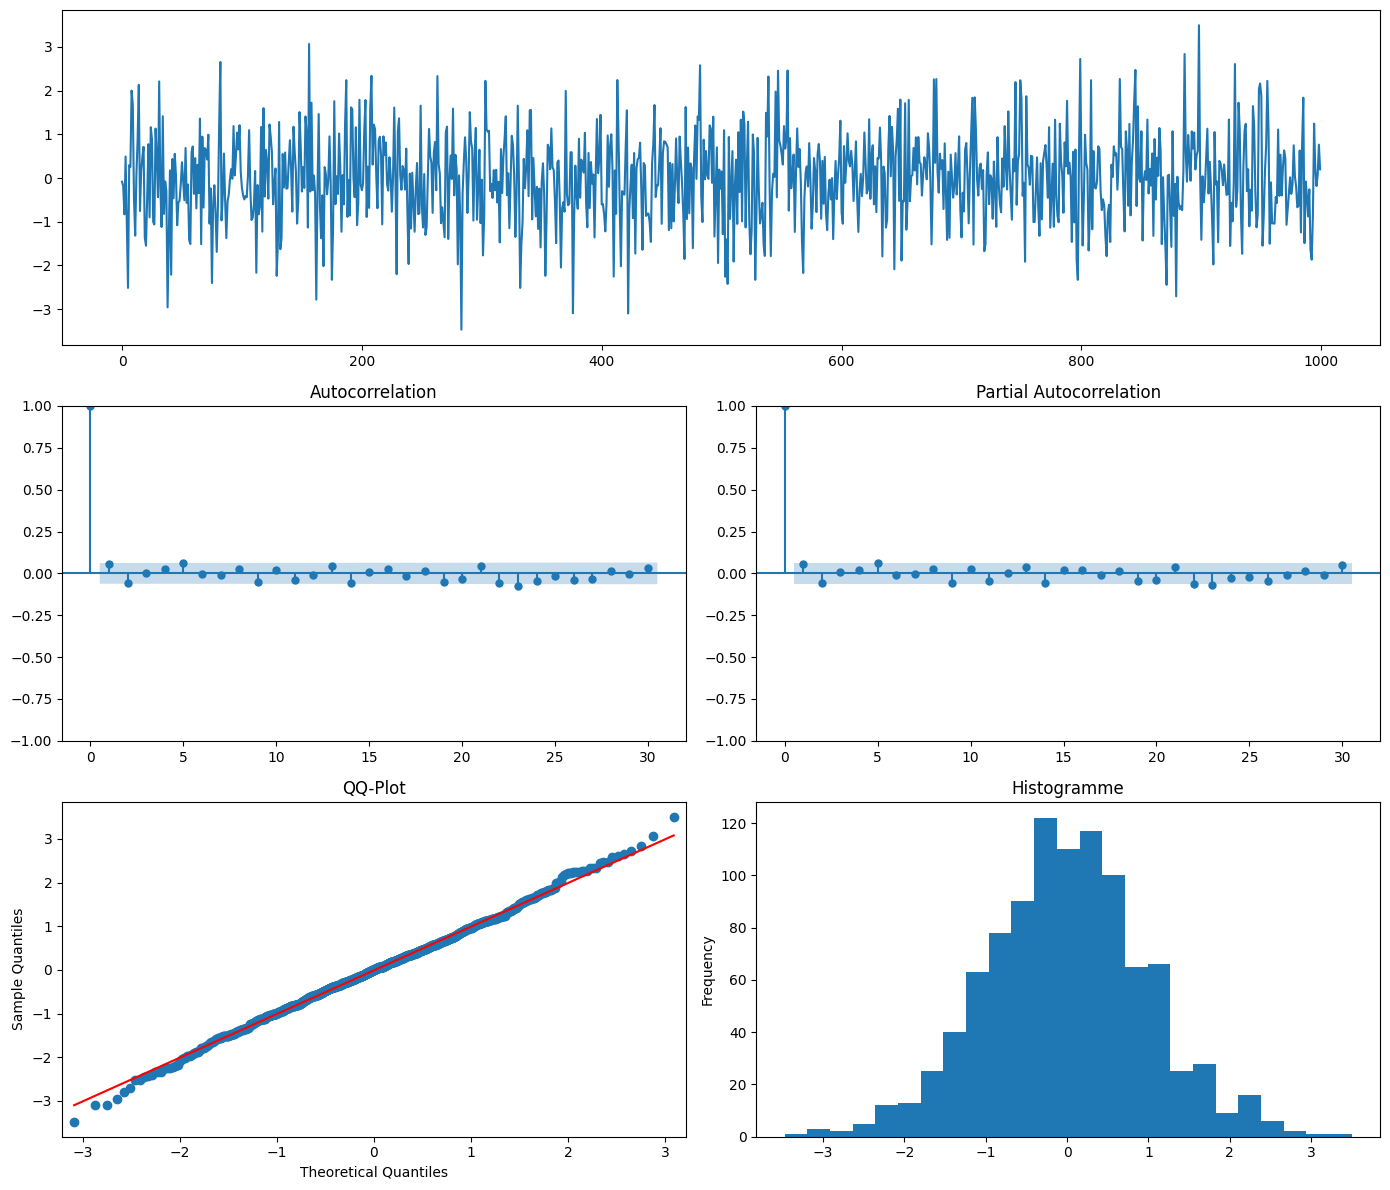

In [1]:
import numpy as np
 
# on génère un bruit blanc gaussien
e = np.random.normal(size=1000)

# on visualise la série avec la fonction définie dans le script fonctions.py
import fonctions as fct
fct.ts_plot(e)

**Interprétation :** les graphiques ci-dessus ressemblent à la structure souhaitée d'une série chronologique d'erreurs :
- pas de pics dans les graphes ACF et PACF 
- le QQ-plot et l'histogramme indiquent un comportement normal

### **1.6. La marche aléatoire**

Un processus de marche aléatoire $\{x_t\}_{t=1}^{T}$ est une série qui vérifie :  
$x_t = x_{t-1} + \epsilon_t$ avec $\epsilon_t$ un bruit blanc

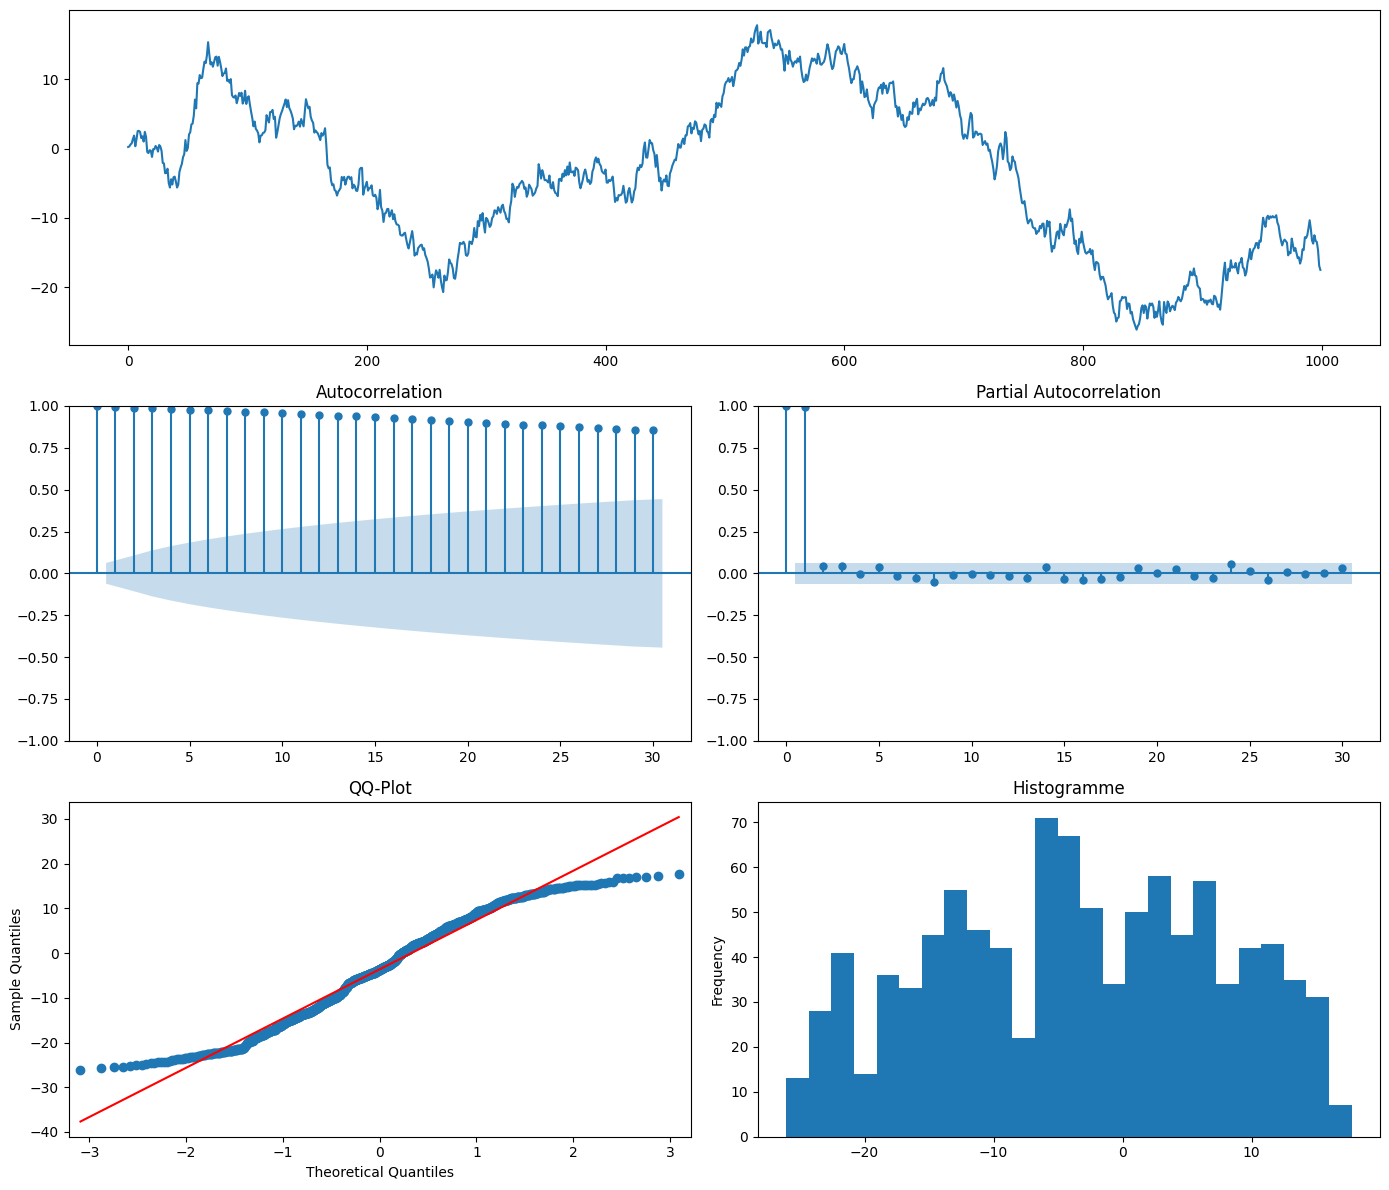

In [2]:
#paramètres
T = 1000
e = np.random.normal(size=T)
x = np.zeros_like(e)
 
#simulation d'une marche aléatoire
for t in range(T):
    x[t] = x[t-1] + e[t]
    
#visualisation
fct.ts_plot(x)

**Interprétation :** on voit la ressemblance entre ce processus de marche aléatoire et les cours d'actifs en bourse qui sont caractérisés par : 
- un ACF élevé pour toute longueur de décalage et un PACF élevé pour le premier décalage uniquement 
- un QQ-plot et un histogramme indiquant que la série n'est pas un bruit blanc

### **1.7. Modèle autorégressif**

Une série temporelle $\{x_t\}_{t=1}^{T}$ qui suit un modèle autorégressif d'ordre $p$ (et noté $AR(p)$) est telle que :  
$x_t = \mu + \Sigma_{i=1}^{p}\phi_i x_{t-i} + \epsilon_t$ avec $\mu$ une constante et $\epsilon_t$ un bruit blanc

Un processus autorégressif d'ordre 1 est donc donné par :
$AR(1)$ : $x_t = \mu + \phi x_{t-1} + \epsilon_t$ 

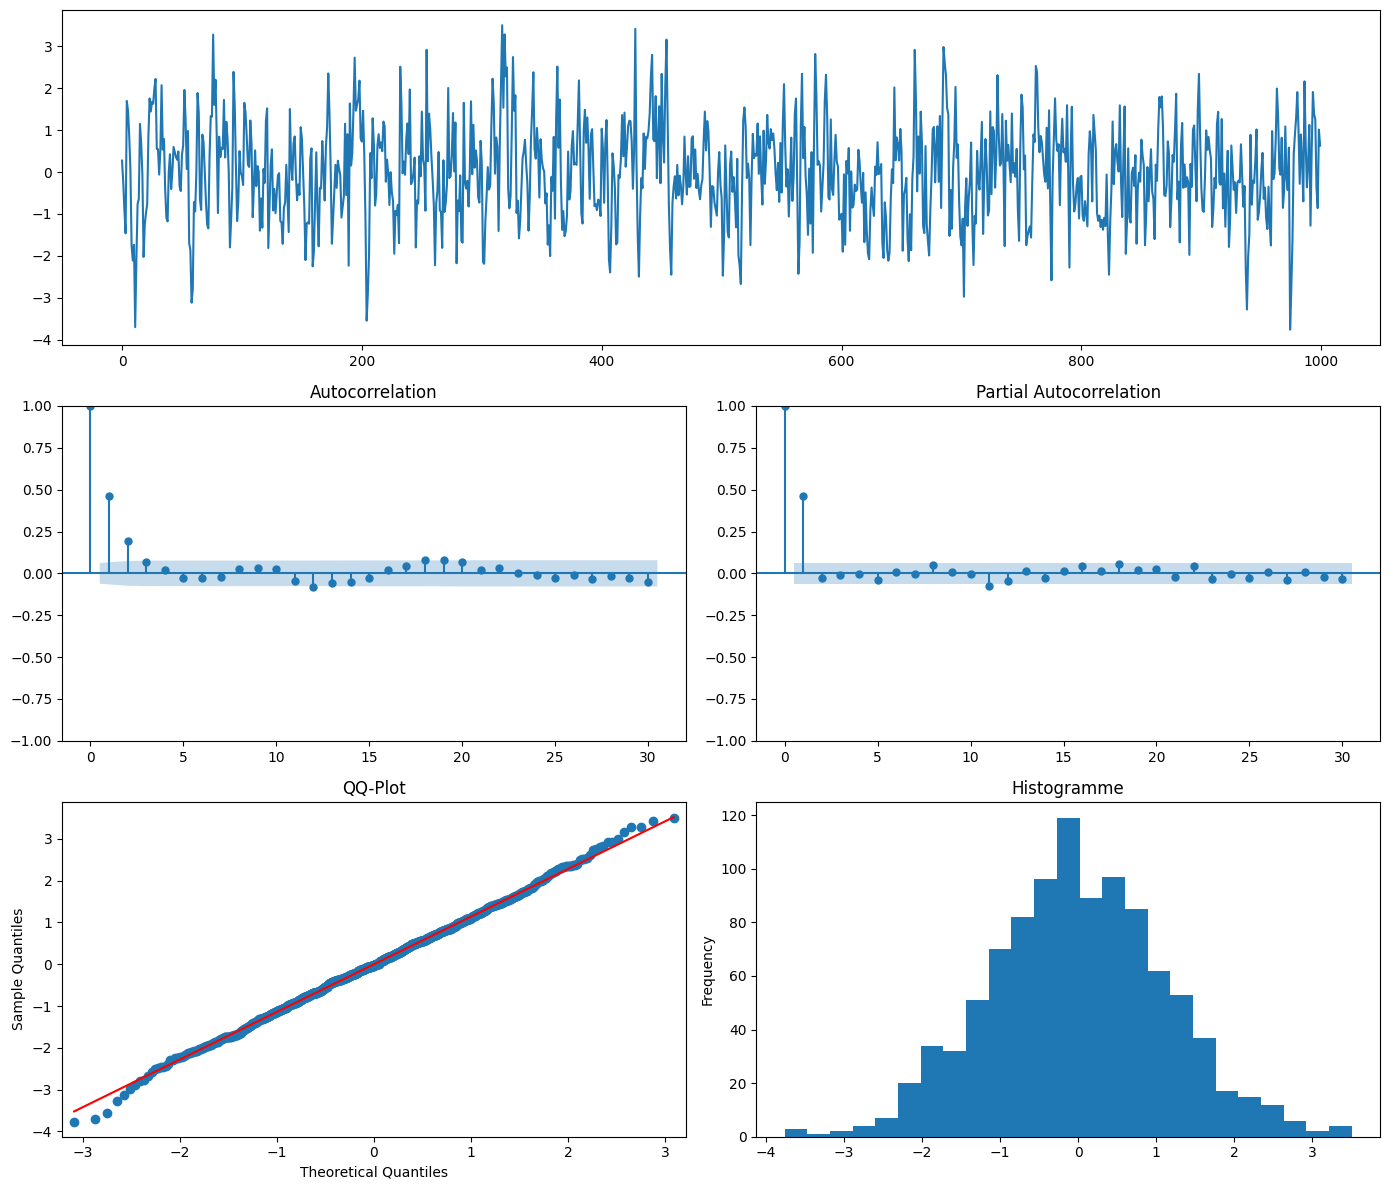

In [10]:
#paramètres
T = 1000
e = np.random.normal(size=T)
x = np.zeros_like(e)
phi = 0.5
 
#simulation d'un processus AR(1)
for t in range(T):
    x[t] = phi * x[t-1] + e[t]
    
#visualisation
fct.ts_plot(x)

**Interprétation :**
- pour un processus AR(1) avec $\phi=0.3$,on voit sur les graphiques ACF et PACF, un pic au premier décalage qui tend de suite vers 0
- l'histogramme et le QQ-plot indiquent des résidus presque aléatoires.

*Remarque pas anodine* : la marche aléatoire introduite précédemment est un processus AR(1), et il n'est pas stationnaire. Par contre, la série différenciée $(x_t - x_{t-1})$ est stationnaire. La stationnarité d'un processus $AR(1)$ dépend de si $|\phi|<1$. On peut généraliser cette propriété aux processus $AR(p)$.

### **1.8. Modèle moyenne mobile**

Le modèle de moyenne mobile d'ordre $q$ noté $MA(q)$ suppose que la série temporelle observée peut être représentée par une combinaison linéaire de termes d'erreur de bruit blanc. Cela s'écrit donc :  
$x_t = \epsilon_t + \Sigma_{i=1}^{q}\theta_i\epsilon_{t-i}$ avec $\epsilon_t$ un bruit blanc

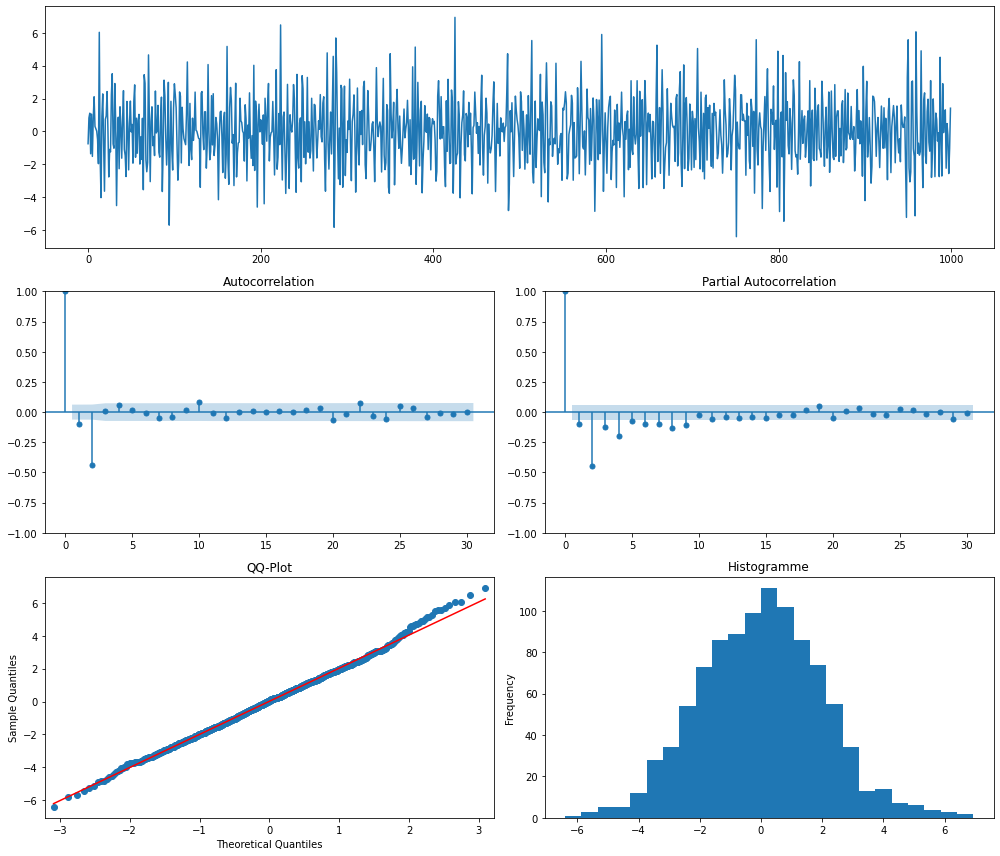

In [4]:
#paramètres
T = 1000
e = np.random.normal(size=T)
x = np.zeros_like(e)
theta1 = 0.8
theta2 = -1.4
 
# simulation d'un modèle MA(2)
for t in range(T):
    x[t] = e[t] + theta1 * e[t-1] + theta2 * e[t-2]

#visualisation
fct.ts_plot(x)

**Interprétation :** pour le processus $MA(2)$ avec les paramètres choisis, on voit un pic plus important pour le deuxième décalage dans les tracés ACF et PACF. 
On peut observer également que le pic dans le graphique PACF ne décroît pas immédiatement mais prend quelques périodes pour se "désintégrer".

*Remarque toujours pas anodine* : un processus $MA(q)$ est toujours stationnaire.

### **1.9. Modèle autorégressif et moyenne mobile**

𝜖𝑡+Σ𝑝𝑖=1𝜙𝑖𝑥𝑡−𝑖+Σ𝑞𝑖=1𝜃𝑖𝜖𝑡−𝑖 aUn processus $ARMA(p,q)$ est une combinaison des deux modèles précédents et s'écrit donc :  
$x_t = \epsilon_t + \Sigma_{i=1}^{p}\phi_i x_{t-i} + \Sigma_{i=1}^{q}\theta_i\epsilon_{t-i}$ avec $\epsilon_t$ un bruit blanc

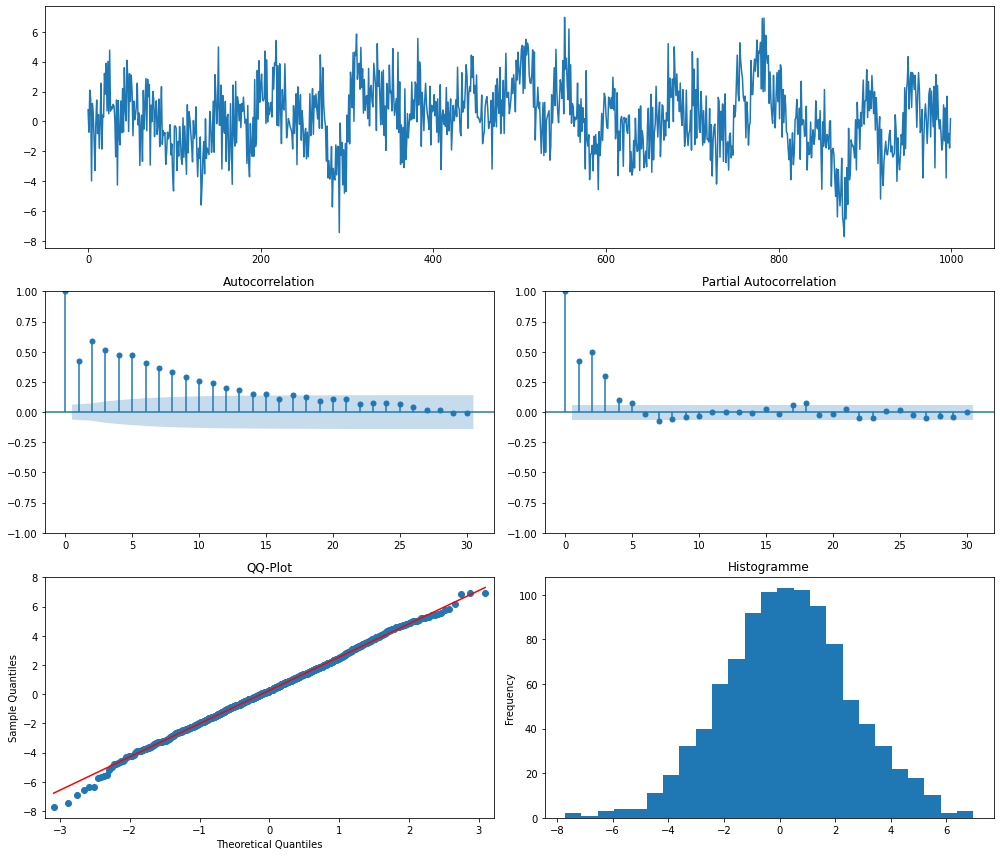

In [5]:
#paramètres
T = 1000
e = np.random.normal(size=T)
x = np.zeros_like(e)
phi1 = 0.3
phi2 = 0.6
theta1 = 0.8
theta2 = -1.1
theta3 = 0.5

# simulation d'un modèle ARMA(2,3)
for t in range(T):
    x[t] = e[t] + phi1 * x[t-1] + phi2 * x[t-2] + theta1 * e[t-1] + theta2 * e[t-2] + theta3 * e[t-3]

#visualisation
fct.ts_plot(x)

**Interprétation :** on voit clairement que la série n'est pas stationnaire et donc on n'ira pas beaucoup plus loin pour l'interprétation...

## **2. Des exemples de séries temporelles**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

Importer, afficher et commenter les séries temporelles :
- "sunspot" : nombre annuel de tâches solaires de 1790 à 1970
- "uspop" : population des Etats-Unis, en millions, de 1790 à 1990 (fréquence décennal)
- "beer" : production mensuelle de bière en Australie, en mégalitres, de janvier 1956 à aout 1995
- "lynx" : nombre annuel de lynx capturés au Canada, de 1821 à 1934

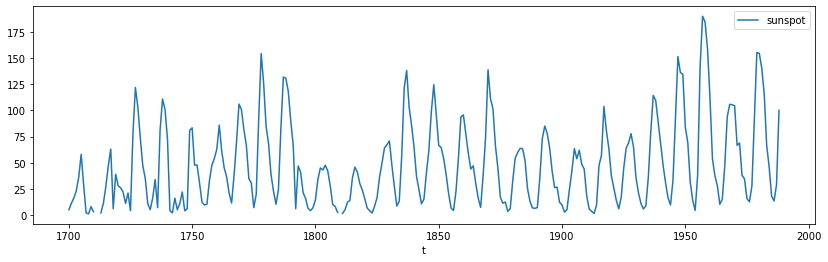

In [7]:
sunspot = pd.read_csv("data/sunspot.csv", index_col="t")
sunspot.plot(y="sunspot", figsize=(14,4));
#fct.ts_plot(sunspot["sunspot"])

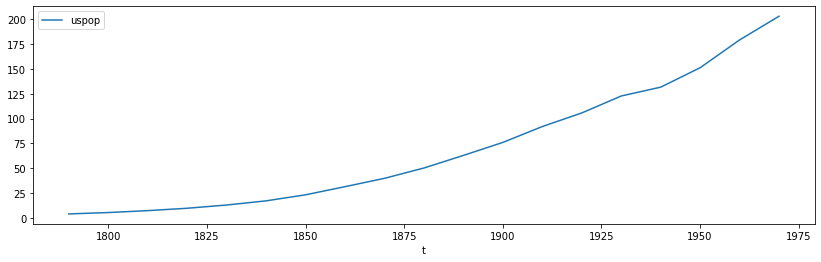

In [8]:
uspop = pd.read_csv("data/uspop.csv", index_col="t")
uspop.plot(y="uspop", figsize=(14,4));
#fct.ts_plot(uspop["uspop"])

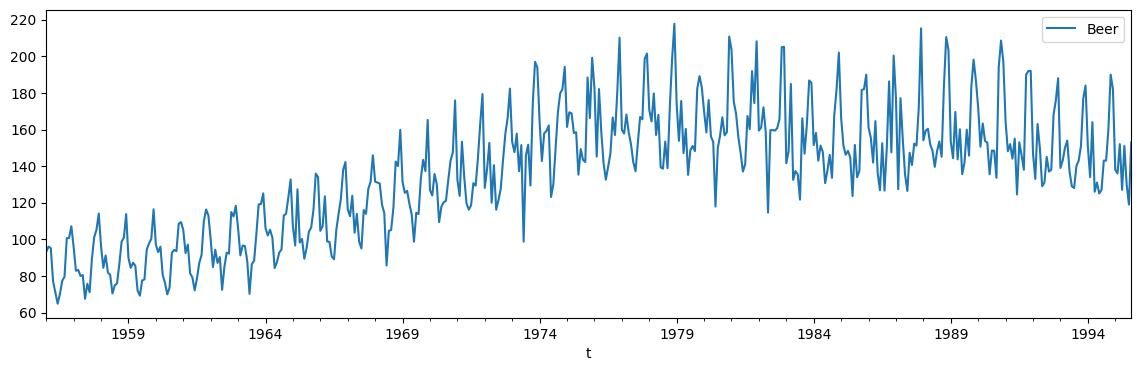

In [57]:
beer = pd.read_csv("data/beer.csv", header=None, names=["t", "Beer"], parse_dates=True, dayfirst=True, index_col="t")
beer.plot(y="Beer", figsize=(14,4));
#fct.ts_plot(beer["Beer"])

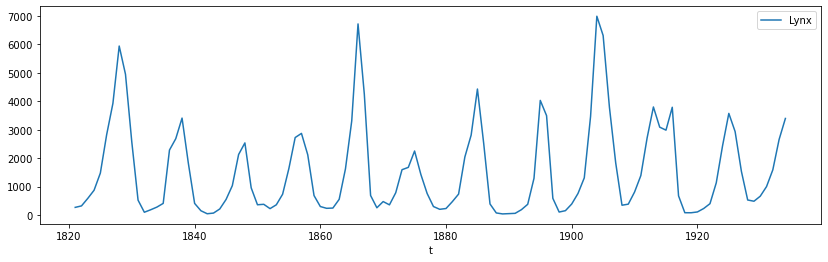

In [10]:
lynx = pd.read_csv("data/lynx.csv", index_col="t")
lynx.plot(y="Lynx", figsize=(14,4));
#fct.ts_plot(beer["Beer"])

## **3. Décomposition d'une série temporelle**

Le principe de la décomposition des séries temporelles est de découper les séries originales en plusieurs composants indépendants (qu'on a vus plus haut) : tendance, saisonnalité, cycle et bruit.

Pour illustrer tout ça, on va utiliser des données qui sont aux séries temporelles ce que le dataset "Titanic" est au machine learning, la base : la série AirPassenger qui mesure le nombre mensuel de passagers aériens, en milliers, de janvier 1949 à décembre 1960.

Dans la suite, on va noter $X_{t}$  la série AirPassengers et $Y_t=ln(X_t)$. 

**Exo :** pour commencer, charger le dataset et afficher simplement la série (sans utiliser la fonction `ts_plot`) puis afficher aussi la série logarithmique. Commenter les résultats.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

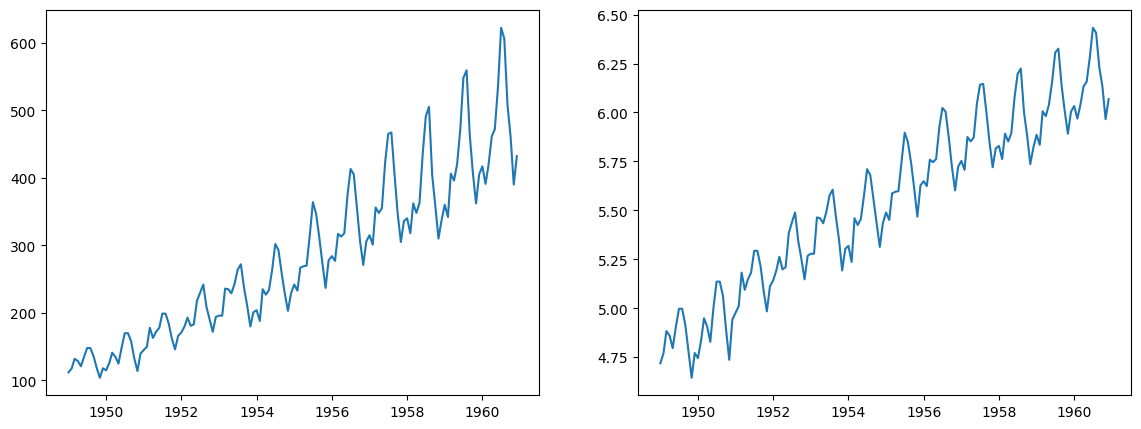

In [20]:
x = pd.read_csv('data/AirPassengers.csv', index_col='t', parse_dates=True)
y = np.log(x)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,5))

ax1.plot(x)
ax2.plot(y);

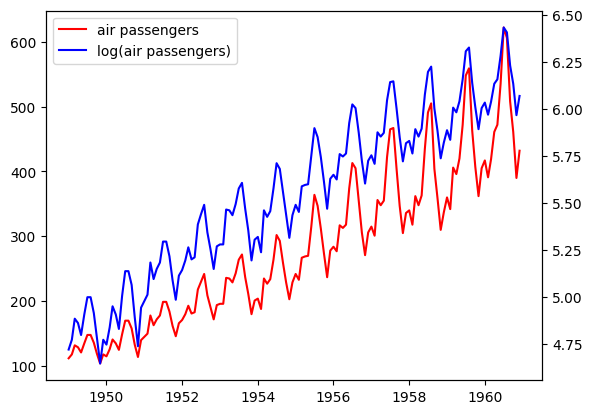

In [30]:
# afficher les 2 courbes sur le même graphique
fig, ax = plt.subplots()
l1 = ax.plot(x, c='r', label="air passengers")

ax2 = ax.twinx()
l2 = ax2.plot(y, c='b', label="log(air passengers)")

# légende
l = l1 + l2
ax.legend(l, [li.get_label() for li in l]);

### **3.1. La tendance**

On l'a vu un dans le notebook d'intro, une façon d'identifier la tendance consiste à lisser la courbe en utilisant des moyennes mobiles sur une fenêtre glissante d'observations.

**Exo :** faire une figure avec plusieurs graphiques, chacun représentant 2 séries : la série originale et la série des moyennes mobiles pour différentes longueur de fenêtres glissantes. Commenter les résultats

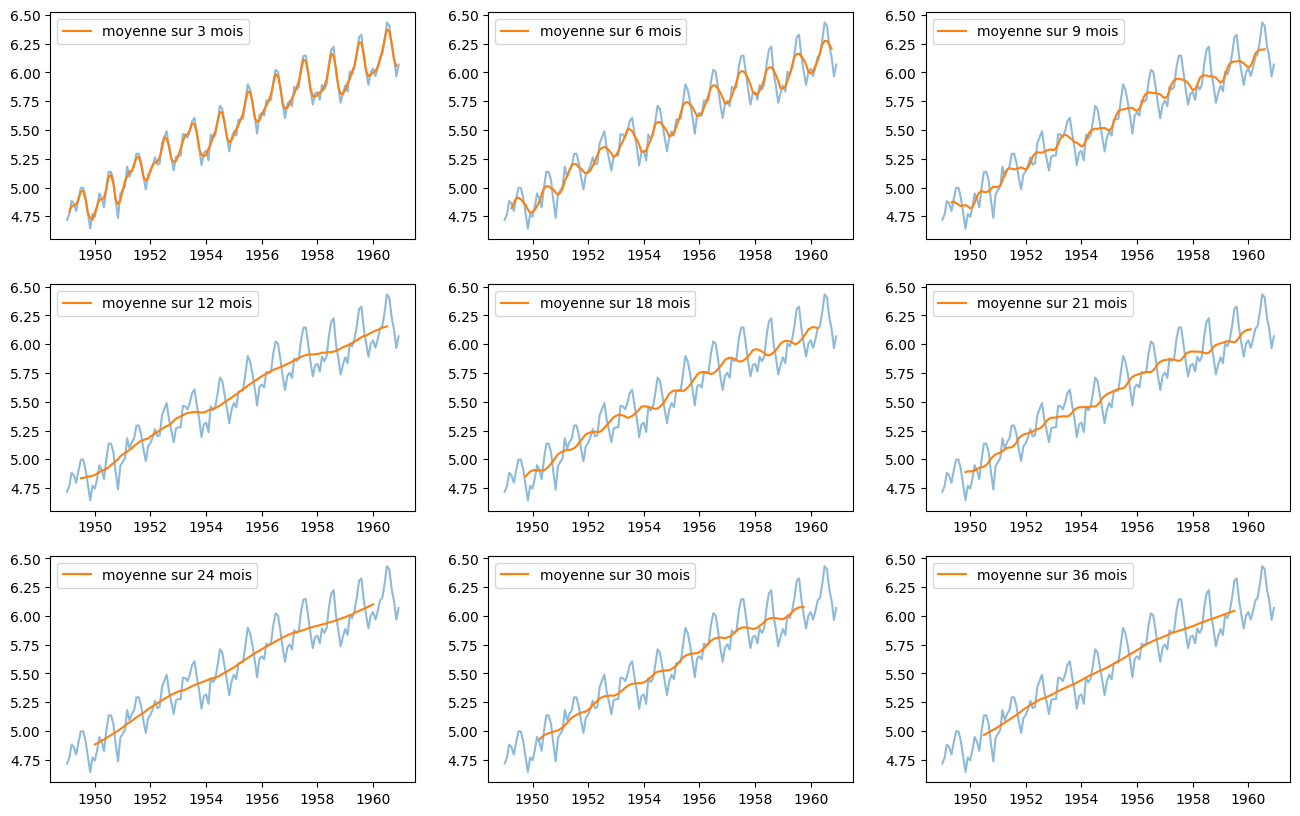

In [35]:
win = [3,6,9,12,18,21,24,30,36]

fig = plt.figure(figsize=(16,10))

for i in range(len(win)):
    ax = fig.add_subplot(3, 3, i+1)
    ax.plot(y, alpha=0.5)
    ax.plot(y.rolling(win[i], center=True).mean(),
            label=f"moyenne sur {win[i]} mois")
    ax.legend()

### **3.2. Saisonnalité**

Une manière de vérifier l'effet saisonnier est de tracer une courbe pour chaque année en prenant les mois comme abscisses et visualiser ainsi la répartition des passagers au cours de chaque année. Just do it.

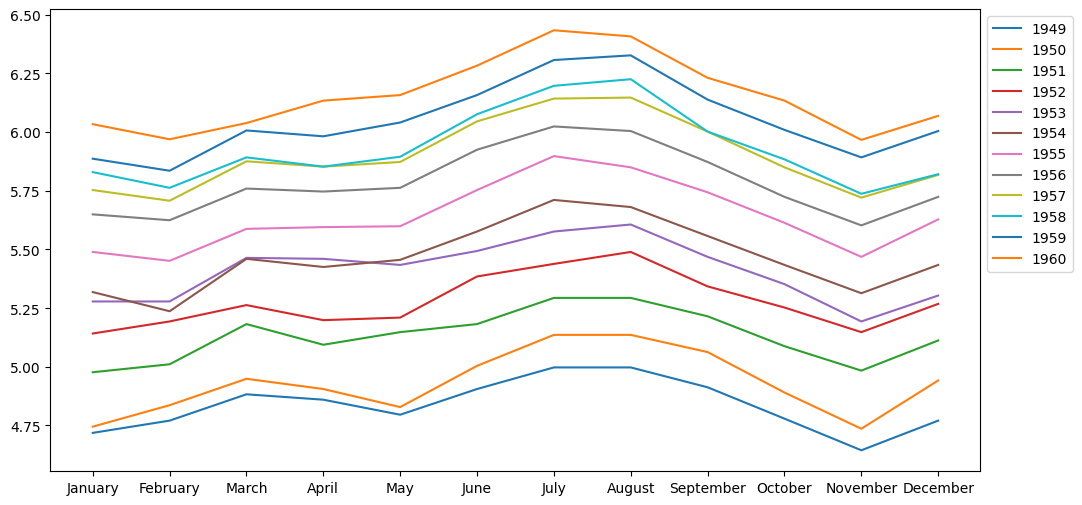

In [47]:
yrs = y.index.year.unique()
mths = y.index.month_name().unique()

plt.figure(figsize=(12,6))

for yr in yrs :
    plt.plot(mths, y.loc[str(yr)], label=str(yr))

plt.legend(bbox_to_anchor=(1,1));

### **3.3. Bruit**

**Exo :** utiliser la fonction `seasonal_decompose` qui renvoie la série temporelle d'origine, la tendance, la saisonnalité et les résidus

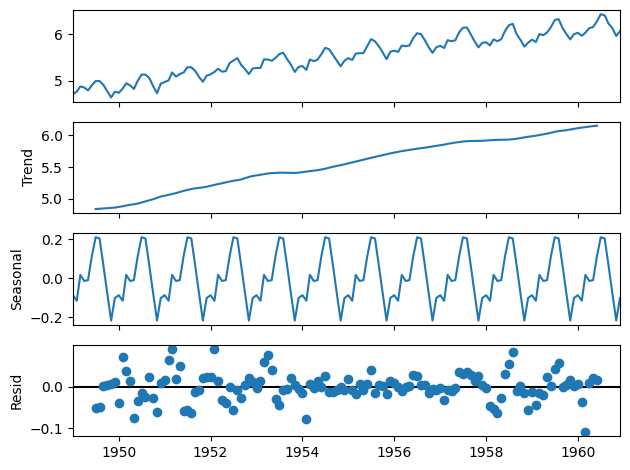

In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(y, model="additive")
decomp.plot();

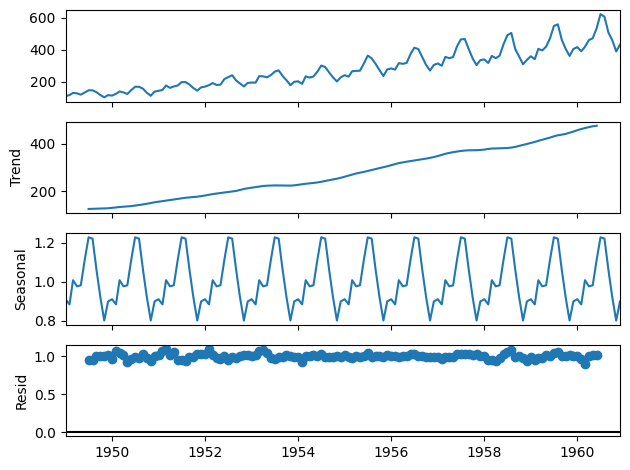

In [55]:
decomp = seasonal_decompose(x, model="multiplicative")
decomp.plot();

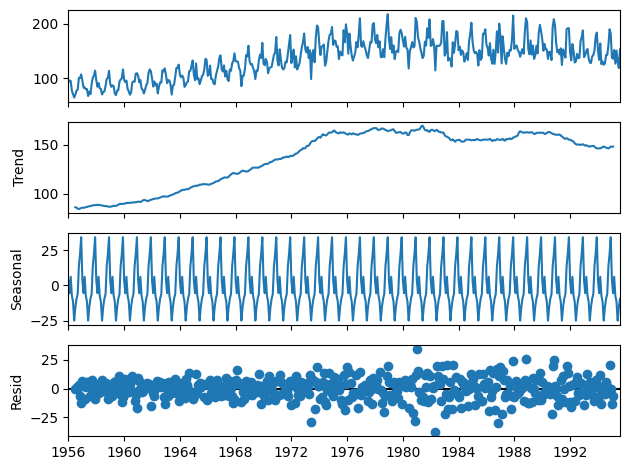

In [59]:
decomp = seasonal_decompose(beer, model="additive")
decomp.plot();

## **4. Prévision avec un lissage exponentiel**

Le lisage exponentiel est une technique de lissage qui ressemble un peu aux moyennes mobiles et peut être utilisée pour prédire une série temporelle. C'est en fait un cas particulier des modèles ARMA déjà évoqués. On en distingue différents types (simple, double, triple...). On notera que les lissages exponentiels simple et double ne sont plus vraiment d'actualité. En revanche le lissage exponentiel triple ou méthode de Holt-Winters qui prend en compte une composante saisonnière, lui, est parfois utilisé.

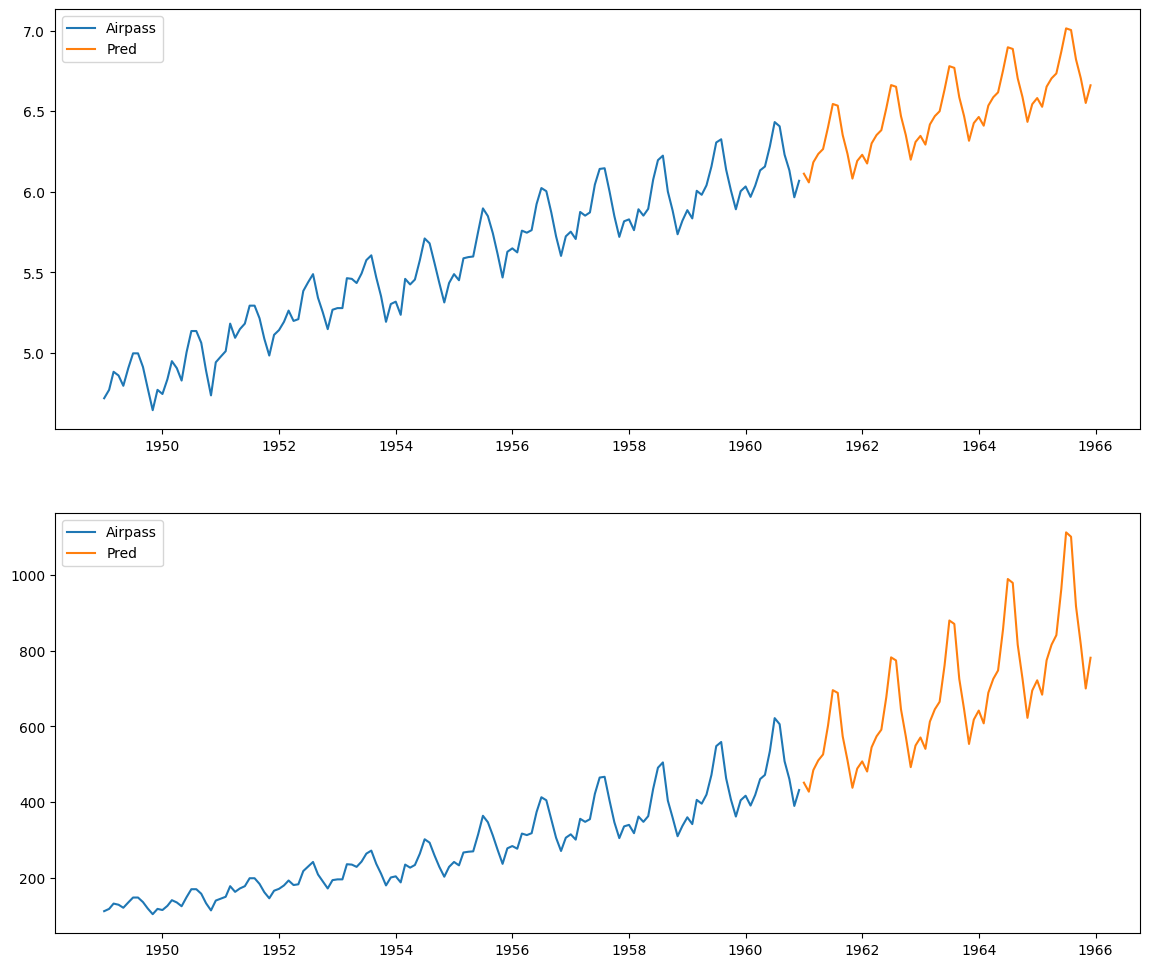

In [62]:
from statsmodels.tsa.api import ExponentialSmoothing

let = ExponentialSmoothing(y.values, seasonal_periods=12, trend='add', seasonal='add').fit()
y_pred = let.forecast(60)
x_pred = np.exp(y_pred)

fig, (ax1,ax2) = plt.subplots(2,1, figsize=(14,12))

ax1.plot(y, label='Airpass')
ax1.plot(pd.date_range(y.index[len(y)-1], periods=60, freq='M'), y_pred, label='Pred')
ax1.legend()

ax2.plot(x, label='Airpass')
ax2.plot(pd.date_range(y.index[len(y)-1], periods=60, freq='M'), x_pred, label='Pred')
ax2.legend()

plt.show()

## **5. Prévision à l'aide d'un modèle ARIMA**

Un modèle autoréfressif intégré à moyennes mobiles (ARIMA) est une généralisation du modèle ARMA, aperçu plus haut. 

Les modèles ARIMA sont appliqués dans certains cas où les données montrent une non-stationnarité, où une étape de différenciation initiale (correspondant à la partie "intégrée" du modèle) peut être appliquée une ou plusieurs fois pour éliminer la non-stationnarité.

Dans le modèle de base, trois paramètres $(p,d,q)$ sont utilisés pour paramétrer les modèles ARIMA. Par conséquent, un modèle ARIMA est noté $ARIMA(p,d,q)$ et est défini par :
$$
\left(1 - \sum_{i=1}^p \phi_i L^i \right) (1 - L)^d y_t = \mu + \left(1 + \sum_{i=1}^q \theta_i L^i \right) \varepsilon_t
$$

Une généralisation est le modèle SARIMA, ou ARIMA saisonnier, qui permet de tenir compte en plus de la saisonnalité. Ce modèle est caractérisé non plus par 3 paramètres $(p,d,q)$ mais par 7 ! Le modèle SARIMA noté $SARIMA(p,d,q)(P,D,Q)_s$ où :
- $s$ est la période de la saisonnalité
- $(P,D,Q)$ sont les ordres de la partie saisonnière

On va essayer de pas trop rentrer dans les détails théoriques mais de voir par la pratique.

### **5.1. Stationnarisation de la série**

Les séries ont généralement une tendance et une saisonnalité. Pour pouvoir les modéliser par des processus stationnaires comme les ARMA, il faut les stationnariser. On va voir en pratique comment faire.

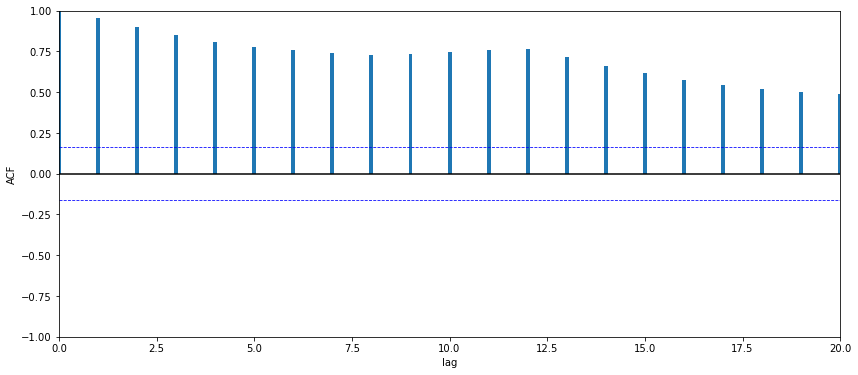

In [20]:
fct.plot_acf_pacf(y)

La sortie ACF présente une décroissance lente vers 0, ce qui traduit un problème de non-stationnarité. On effectue donc une différenciation $(1-L)$ c'est-à-dire qu'on va regarder la série $Y_t-Y_{t-1}$.

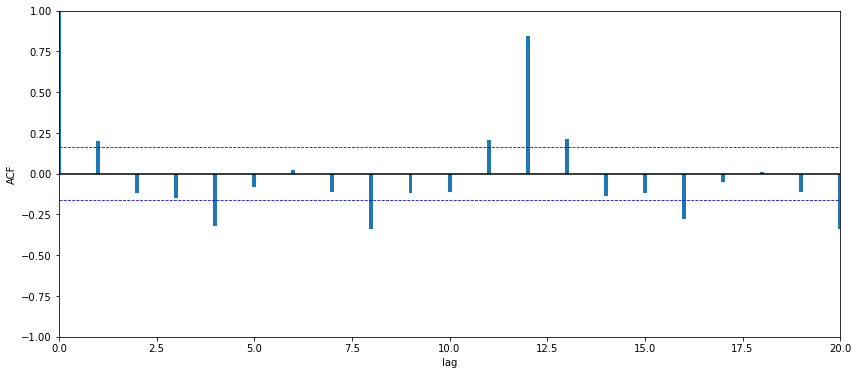

In [21]:
y_diff_1 = y - y.shift(1)
fct.plot_acf_pacf(y_diff_1[1:])

Toujours une décroissance lente vers 0 de la série différenciée d'ordre 1 **pour les multiples de 12**. Cela correspond à la saisonnalité et on va donc différencier à nouveau en appliquant cette fois $(1-L^{12})$ .

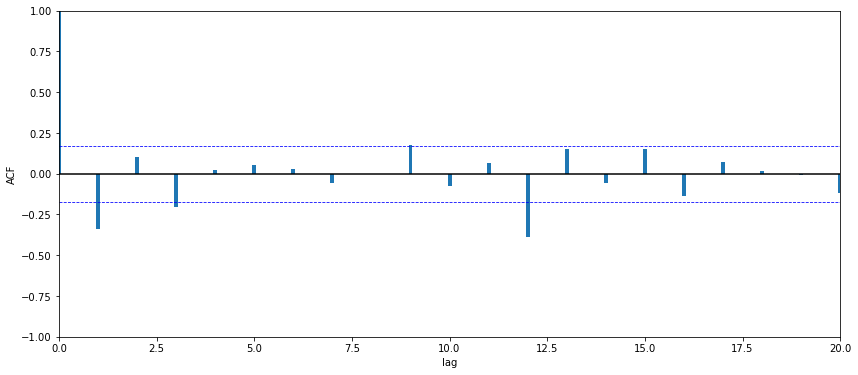

In [22]:
y_diff_1_12 = y_diff_1 - y_diff_1.shift(12)
fct.plot_acf_pacf(y_diff_1_12[13:])

Avec cette double différenciation, on s'approche d'un autocorrélogramme simple empirique. On va donc modéliser la série $(1-L)(1-L^{12})ln(X_t)$ par un modèle ARMA.

### **5.2. Identification, estimation et validation de modèles**

On va s'appuyer sur les sorties ACF et PACF donc on peut utiliser une des fonctions disponibles dans `fonctions.py` par exemple `ts_plot` pour changer.

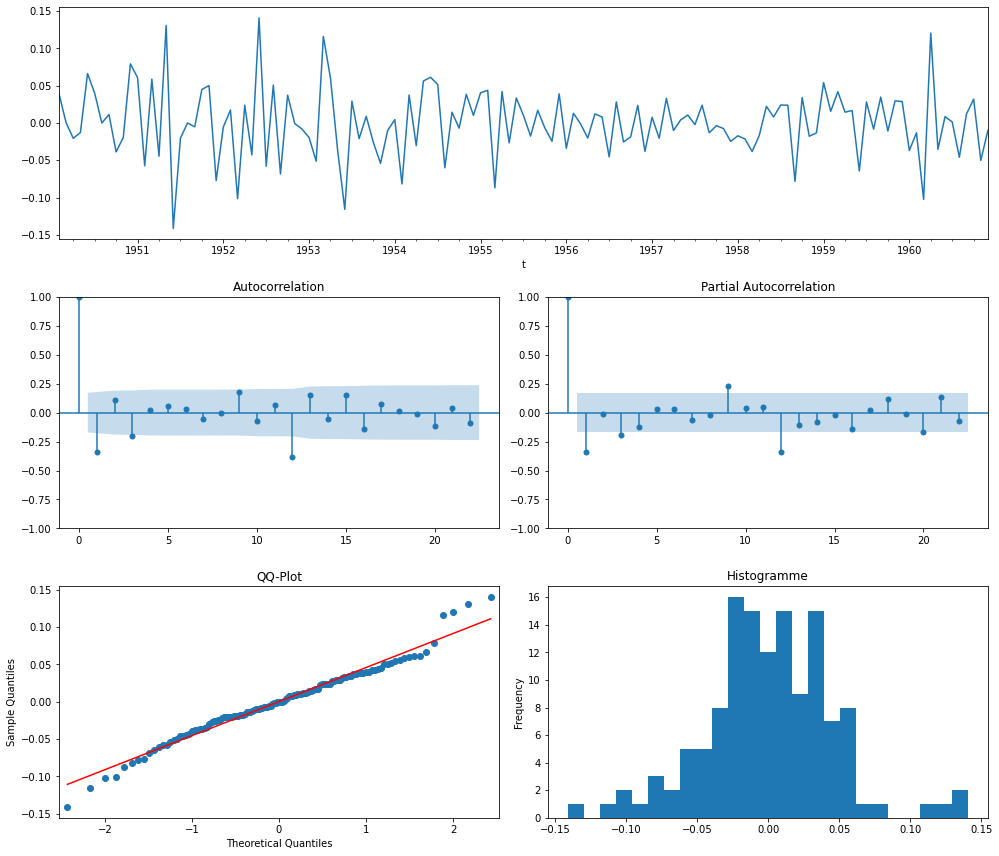

In [24]:
fct.ts_plot(y_diff_1_12[13:].Airpass)

Les graphiques ACF et PACF permettent de voir empiriquement qu'on va avoir un modèle $SARIMA(p,d,q)(P,D,Q)_s$ avec $s=12$. On va tester différents modèles.

**Modèle 1 :** pour commencer on va prendre un $SARIMA(1,1,1)(1,1,1)_{12}$ qui s'écrit :
$$(1-\phi_{1}L)(1-\phi'_{1}L^{12})(1-L)(1-L^{12})ln(X_{t})=(1+\theta_{1}L)(1+\theta'_{1}L^{12})\epsilon_{t} $$

In [28]:
from statsmodels.tsa.statespace.sarimax import *

m1 = SARIMAX(y.values, order=(1,1,1), seasonal_order=(1,1,1,12))
res1 = m1.fit(disp=False)
print(res1.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 245.152
Date:                            Wed, 29 Jun 2022   AIC                           -480.304
Time:                                    10:41:40   BIC                           -465.928
Sample:                                         0   HQIC                          -474.462
                                            - 144                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1701      0.212      0.801      0.423      -0.246       0.586
ma.L1         -0.5649      0.184   

Ce modèle a des coefficients non significatifs, on en teste un second en retirant dans le paramètre associé à la plus grande p-value : ici c'est le terme autorégressif saisonnier.

**Modèle 2 :** on va donc prendre un $SARIMA(1,1,1)(0,1,1)_{12}$ qui s'écrit :
$$(1-\phi_{1}L)(1-L)(1-L^{12})ln(X_{t})=(1+\theta_{1}L)(1+\theta'_{1}L^{12})\epsilon_{t} $$

In [29]:
m2 = SARIMAX(y.values, order=(1,1,1), seasonal_order=(0,1,1,12))
res2 = m2.fit(disp=False)
print(res2.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 244.945
Date:                            Wed, 29 Jun 2022   AIC                           -481.890
Time:                                    10:41:57   BIC                           -470.389
Sample:                                         0   HQIC                          -477.217
                                            - 144                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1841      0.201      0.915      0.360      -0.210       0.578
ma.L1         -0.5667      0.174   

Ce modèle a toujours un coefficient non significatif, on en teste un 3ème modèle en retirant dans le terme autorégressif d'ordre 1.

**Modèle 3 :** on va donc prendre un $SARIMA(0,1,1)(0,1,1)_{12}$ qui s'écrit :
$$(1-L)(1-L^{12})ln(X_{t})=(1+\theta_{1}L)(1+\theta'_{1}L^{12})\epsilon_{t} $$

In [30]:
m3 = SARIMAX(y.values, order=(0,1,1), seasonal_order=(0,1,1,12))
res3 = m3.fit(disp=False)
print(res3.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 244.696
Date:                            Wed, 29 Jun 2022   AIC                           -483.393
Time:                                    10:42:34   BIC                           -474.767
Sample:                                         0   HQIC                          -479.888
                                            - 144                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4013      0.073     -5.496      0.000      -0.544      -0.258
ma.S.L12      -0.5566      0.096   

Cette fois tous les coefficients sont significatifs, il faut encore tester ce qu'on appelle la "blancheur" des résidus : on veut avoir des résidus qui sont un bruit blanc (faible), c'est-à-dire, entre autres qu'ils sont non corrélés.  
Pour ça on peut utiliser le test de Ljung-Box d'autocorrélation des résidus qui est implémenté dans la fonction `acorr_ljungbox` de `statsmodels.stats.diagnostic` 

In [35]:
from statsmodels.stats.diagnostic import acorr_ljungbox
print('Retard : p-value')
for lag in [6, 12, 18, 24, 30, 36]:
    print('{} : {}'.format(lag, acorr_ljungbox(res3.resid, lags=lag, return_df=False)[1].mean()))

Retard : p-value
6 : 0.981720860200859
12 : 0.9083064612785483
18 : 0.6207396507474344
24 : 0.5187361239841579
30 : 0.5161804687133994
36 : 0.560395354197207


Toutes les p-values sont élevées ce qui signifie qu'on ne peut pas rejeter l'hypothèse nulle du test. Or, l'hypothèse $H_0$ est qu'il n'y a pas d'autocorrélation des résidus, on peut pas la rejeter, donc on est bon !

On peut enfin tester la normalité des résidus avec le test de Shapiro-Wilk implémenté dans la fonction `scipy.stats.shapiro`, l'hypothèse nulle étant que les étant que les observations sont normalement distribuées, on souhaite encore une fois une p-value élevée pour ne pas rejeter $H_0$.

In [36]:
from scipy.stats import shapiro
shapiro(res3.resid[13:])

ShapiroResult(statistic=0.9908484220504761, pvalue=0.547280490398407)

Le test de normalité est également validé pour ce modèle et on peut afficher les résidus pour le visualiser :

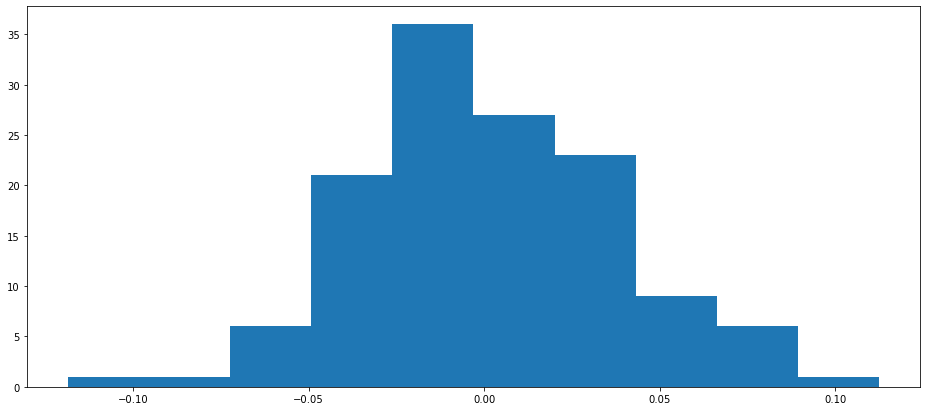

In [37]:
plt.hist(res3.resid[13:], bins=10);

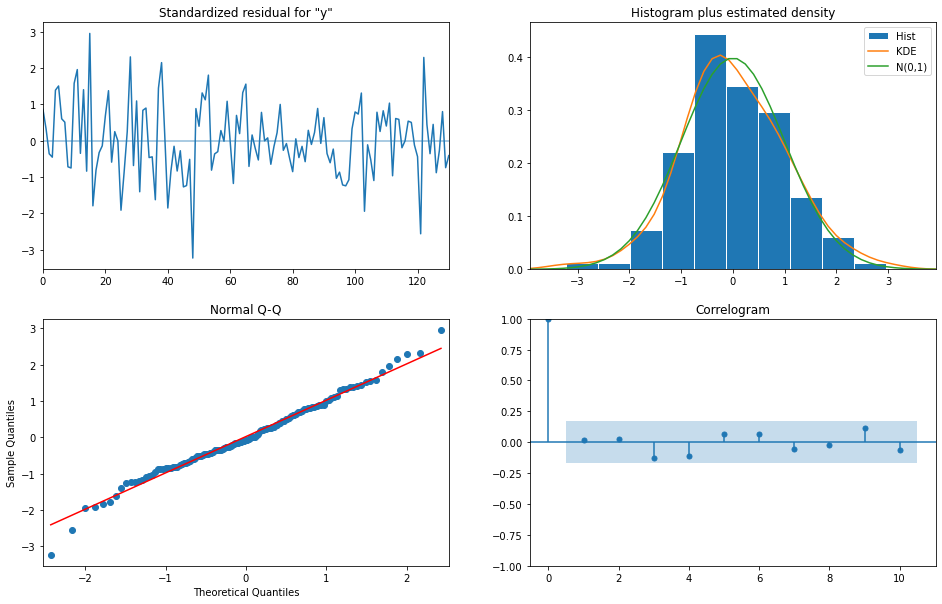

In [38]:
# autre méthode d'affichage des résultats
# attention, ce sont les résidus standardisés par contre donc pas exactement les mêmes que ceux affichés au dessus.
res3.plot_diagnostics(figsize=(16, 10));

### **5.3. Prévision de l’année 1961 avec le modèle retenu**

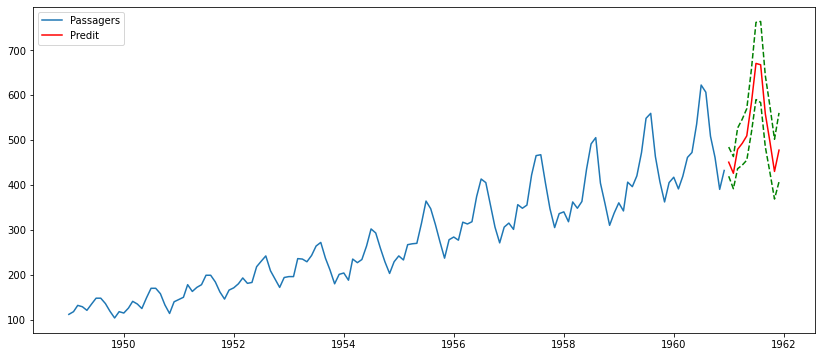

In [39]:
# prédiction et intervalles de confiance
y_pred = res3.get_forecast(12)
x_pred = np.exp(y_pred.predicted_mean)
x_pred_inf = [np.exp(p[0]) for p in y_pred.conf_int(alpha=0.05)]
x_pred_sup = [np.exp(p[1]) for p in y_pred.conf_int(alpha=0.05)]

# affichage
plt.figure(figsize=(14,6))
plt.plot(x.index, x.values, label='Passagers')
plt.plot(pd.date_range(x.index[-1], periods=12, freq='M'), x_pred, color='r', label='Predit')
plt.plot(pd.date_range(x.index[-1], periods=12, freq='M'), x_pred_inf, color='g', linestyle='--')
plt.plot(pd.date_range(x.index[-1], periods=12, freq='M'), x_pred_sup, color='g', linestyle='--')
plt.legend()
plt.show()

### **5.4. Évaluation de la qualité prédictive du modèle**

On a pas eu vraiment besoin de le faire jusqu'à maintenant mais, vous le savez, pour pouvoir faire un modèle prédictif, il faut mettre en place, entraîner, tester et évaluer votre modèle. Pour cela, il faut découper nos données en training et test sets.

**Exo :** splitter en training et test sets en tronquant la série en 1959 pour pouvoir ensuite prédire l'année 1960

**Exo :** vérifier que le modèle retenu précédemment est toujours valide sur la série tronquée "y_train"

**Exo :** prédire les valeurs des années 1959 et 1960 et afficher sur un même graphique les valeurs réelles, prédites et les intervalles de confiance

**Exo :** calculer les 2 métriques RMSE et MAPE pour ces prédictions

**Exo :** répeter les opérations du point 5.4 en modifiant la troncature : training set avec les données jusqu'en 1958 pour prédire un test set avec les années 1959 et 1960

### **5.5. Une autre approche pour la détermination du modèle**

Pour adapter les données de série temporelles à un modèle ARIMA saisonnier avec les paramètres $SARIMA(p,d,q)(P,D,Q)s$, on doit trouver les paramètres optimaux et pour ça on peut aussi faire de la recherche sur grille qui consiste à tester de manière itérative plusieurs valeurs possibles des paramètres et d'évaluer les modèles en utilisant des critères comme le critère AIC ou BIC.

On utilisera nous le critère d'information Akaike ($AIC$) qui mesure la qualité relative des modèles statistiques pour un ensemble d'observations donné. À partir d'un ensemble de modèles, le critère $AIC$ permet d'estime la qualité de chacun des modèle par rapport aux autres modèles. Cela permet donc de sélectionner des modèles. Intuitivement, le critère $AIC$ mesure le compromis entre la qualité de l'ajustement du modèle aux observations fournies et la complexité du modèle (nombre de paramètres inclus et estimés). Le critère $AIC$ est calculé par :

$AIC=2k-2ln(L)$ avec :
- $k$ nombre de paramètres estimés
- $L$ valeur maximale de la vraisemblance (pour simplifier maximiser la vraisemblance revient plus ou moins à minimiser l'erreur)

Le meilleur modèle est celui qui minimise le critère $AIC$.

**Exo :** on continue à modéliser la série logarithmique. Tronquer la série en 1958 (inclus) pour prédire 1959 et 1960

**Exo :** générer les valeurs possibles des paramètres que nous aimerions évaluer, à savoir $(p,d,q)(P,D,Q)$ puisque $s$ sera égal à 12 on le sait. On testera toutes les valeurs entre 0 et 2 pour chacun des 6 paramètres c'est-à-dire $3^6 = 729$ possibilités, c'est long...

**Exo :** boucler sur toutes les combinaisons possibles de paramètres et calculer le critère AIC pour déterminer le meilleur modèle parmi ceux testés (la valeur du critère AIC d'un modèle est facilement récupérable...)

**Exo :**
- entrainer le modèle retenu
- calculer l'AIC
- afficher le summary pour notamment vérifier les p-values des coefficients
- regarder les résidus

**Exo :** prédire à partir du modèle retenu les 2 années 1959 et 1960 et afficher sur un même graphique la série originale, les prédictions et l'intervalle de confiance.

**Exo :** évaluer la qualité prédictive du modèle via RMSE et MAPE.

**Exo :** faire une prévision à long terme  
À l'aide d'un processus ARIMA saisonnier basé sur toute la série temporelle (on modélise toujours la série logarithmique), prédire les 10 années suivantes : déterminer les paramètres du modèle optimal par recherche sur grille.  
Afficher les graphiques qui vous paraissent utiles et intéressants.